In [2]:
import pandas as pd
import seaborn as sns


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_air_passengers.csv')
df


,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<Axes: xlabel='ds', ylabel='y'>

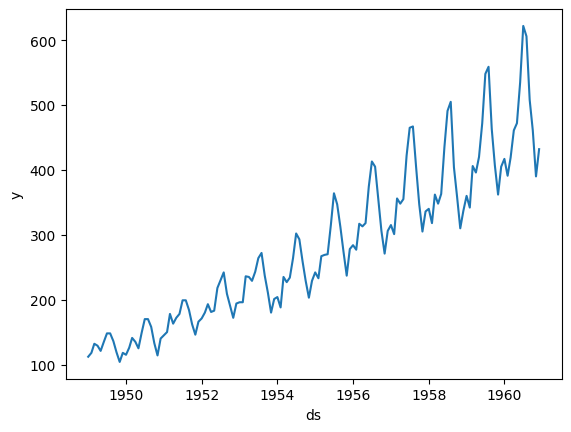

In [4]:
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
pip install prophet

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     ----------------------------------- ---- 51.2/57.6 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 430.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 1.3 MB/s eta 0:00:11
   ---------------------------------------- 0.1/13.3 MB 1.7 MB/s eta 0:00:09
    --------------------------------------- 0.2/13.3 MB 1.7 MB/s eta 0:00:08
    --------------------------------------- 0.3/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.4/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.5/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.5/13.3 MB 1.6 MB/s eta 0:00:09
   - -------------------------------------- 0.6/13.3 MB 1.7 MB/s eta 0:00:08
  

In [8]:
from prophet import Prophet
model = Prophet()


c:\Users\Cosmo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [9]:
model.fit(df)


06:12:34 - cmdstanpy - INFO - Chain [1] start processing
06:12:37 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = model.make_future_dataframe(periods=36, freq='MS')
future


,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [11]:
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,106.662426,58.354207,113.063966,106.662426,106.662426,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,-21.848267,0.0,0.0,0.0,84.814159
1,1949-02-01,108.835452,50.198664,106.286831,108.835452,108.835452,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,-30.607522,0.0,0.0,0.0,78.227931
2,1949-03-01,110.798186,78.697848,137.978361,110.798186,110.798186,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,-0.455949,0.0,0.0,0.0,110.342237
3,1949-04-01,112.971212,78.084011,137.239726,112.971212,112.971212,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,-5.160494,0.0,0.0,0.0,107.810718
4,1949-05-01,115.074141,84.803902,139.687049,115.074141,115.074141,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,-3.807887,0.0,0.0,0.0,111.266255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.432599,620.552798,682.099872,579.544536,585.218817,67.416031,67.416031,67.416031,67.416031,67.416031,67.416031,0.0,0.0,0.0,649.848630
176,1963-09-01,585.549994,573.625032,630.718453,582.569764,588.449569,16.794932,16.794932,16.794932,16.794932,16.794932,16.794932,0.0,0.0,0.0,602.344925
177,1963-10-01,588.566827,537.370782,595.200134,585.423201,591.637495,-22.281598,-22.281598,-22.281598,-22.281598,-22.281598,-22.281598,0.0,0.0,0.0,566.285229
178,1963-11-01,591.684222,504.098187,563.126333,588.366131,594.901177,-57.349389,-57.349389,-57.349389,-57.349389,-57.349389,-57.349389,0.0,0.0,0.0,534.334833


In [12]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.814159,58.354207,113.063966
1,1949-02-01,78.227931,50.198664,106.286831
2,1949-03-01,110.342237,78.697848,137.978361
3,1949-04-01,107.810718,78.084011,137.239726
4,1949-05-01,111.266255,84.803902,139.687049
...,...,...,...,...
175,1963-08-01,649.848630,620.552798,682.099872
176,1963-09-01,602.344925,573.625032,630.718453
177,1963-10-01,566.285229,537.370782,595.200134
178,1963-11-01,534.334833,504.098187,563.126333


c:\Users\Cosmo\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Cosmo\AppData\Local\Programs\Python\Python310\lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


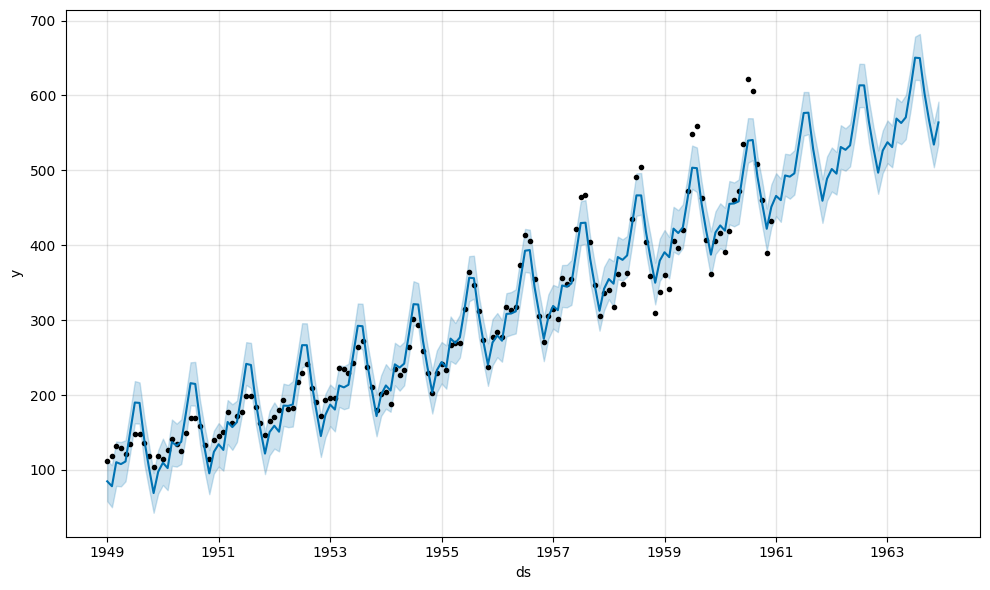

In [13]:
fig_forecast = model.plot(forecast)


In [14]:
cutoffs = pd.to_datetime(['1954-12-01', '1955-12-01', '1956-12-01', '1957-12-01'])


In [15]:
from prophet.diagnostics import cross_validation


In [16]:
df_cv = cross_validation(model, horizon = '1096 days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]06:14:13 - cmdstanpy - INFO - Chain [1] start processing
06:14:17 - cmdstanpy - INFO - Chain [1] done processing
 25%|██▌       | 1/4 [00:04<00:14,  4.93s/it]06:14:19 - cmdstanpy - INFO - Chain [1] start processing
06:14:23 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 2/4 [00:11<00:11,  5.61s/it]06:14:24 - cmdstanpy - INFO - Chain [1] start processing
06:14:27 - cmdstanpy - INFO - Chain [1] done processing
 75%|███████▌  | 3/4 [00:14<00:04,  4.78s/it]06:14:28 - cmdstanpy - INFO - Chain [1] start processing
06:14:28 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 4/4 [00:16<00:00,  4.04s/it]


In [17]:
df_cv


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1955-01-01,237.821995,227.620981,249.357197,242,1954-12-01
1,1955-02-01,241.792078,230.023101,252.619004,233,1954-12-01
2,1955-03-01,267.141230,255.706084,278.761773,267,1954-12-01
3,1955-04-01,257.744480,245.872870,268.931653,269,1954-12-01
4,1955-05-01,261.961916,249.851577,273.476512,270,1954-12-01
...,...,...,...,...,...,...
139,1960-08-01,549.108045,530.359770,569.522659,606,1957-12-01
140,1960-09-01,511.771947,491.685046,531.938418,508,1957-12-01
141,1960-10-01,480.914734,461.064379,501.189359,461,1957-12-01
142,1960-11-01,455.669584,436.667823,476.477621,390,1957-12-01


In [18]:
from prophet.diagnostics import performance_metrics


In [20]:
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,121 days,693.123555,26.327240,19.350079,0.060322,0.039788,0.057458,0.535714
1,122 days,668.295902,25.851420,18.590223,0.057974,0.039788,0.055222,0.571429
2,151 days,650.488962,25.504685,18.138464,0.055441,0.032945,0.052927,0.607143
3,152 days,583.374233,24.153141,16.967466,0.051385,0.030947,0.049272,0.642857
4,182 days,587.896653,24.246580,17.505618,0.050807,0.030947,0.050417,0.595238


In [22]:
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


TypeError: Converting from period[M] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

<Axes: xlabel='horizon', ylabel='mse'>

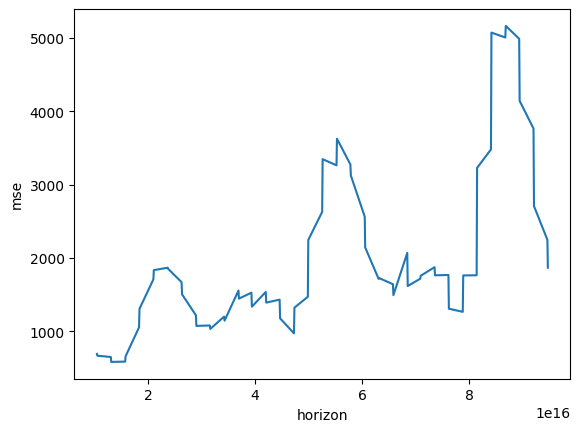

In [23]:
sns.lineplot(x='horizon', y='mse', data=df_p)


<Axes: xlabel='horizon', ylabel='coverage'>

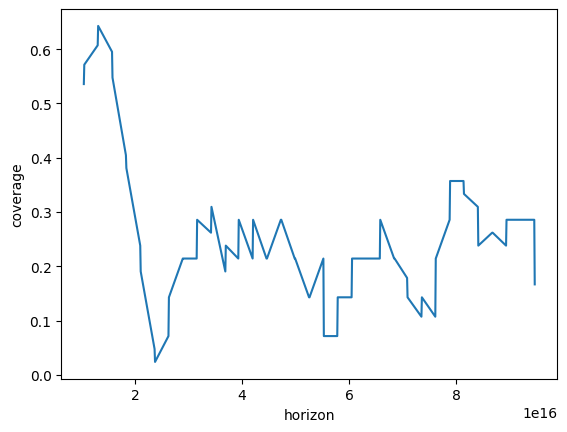

In [24]:
sns.lineplot(x='horizon', y='coverage', data=df_p)
